# Loan Status Prediction - A Classification Project
Sarah Lawson Woods  
October 2021

## Executive Summary - Conclusions & Next Steps
### Goals: 
The purpose of this project is to create different classification models to most accurately predict loan approval status.
### Target: 
Loan_Status, yes or no.
### Findings: 
I created 6 models, a Decision Tree, KNN, 2 Logistic Regression models varying C value and two Random Forest Models with Model 2 performing the best at 84% accuracy and an 81% precision rate on validate which beat my baseline accuracy of 69.4%.
### Results: 
The best predictors I discovered in exploration and modeling were Credit History, Loan_Amount, Married and debatably gender.  In my visuals I found gender to have a higher correlation value than most of the features, I also did a chi squared test to evaluate if there was a relationship and found there was a significant relationship, but in feature importance gender was listed as one of the least important features.
### Conclusion and Next Steps: 
-Some of the features I guessed would be valuable like applicant income and gender were not in a strong relationship with the target. 
-We find that one ML method, random forest Model 2 improves tthe accuracy of default predictions the most in the loan dataset. This ML method is superior to the baseline model of predicting the mode.
### Next Steps:
With more time I would create loops to create a multitude of models varying their parameters and features to find the best accuracy.  I would also run more tests of models with and without gender to see what impact this feature truly has on the accuracy of predictions.

In [98]:
####################################  Imports  ########################################
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
#from sklearn.tree import export_graphviz
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import prepare




# Acquire

In [2]:
df1 = pd.read_csv('loan.csv')
df2 = pd.read_csv('loan2.csv')

In [3]:
# combining the two df's into one
df =pd.concat([df1,df2])

In [4]:
df.shape

(981, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [8]:
df.Gender.value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [9]:
df.Education.value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [10]:
df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

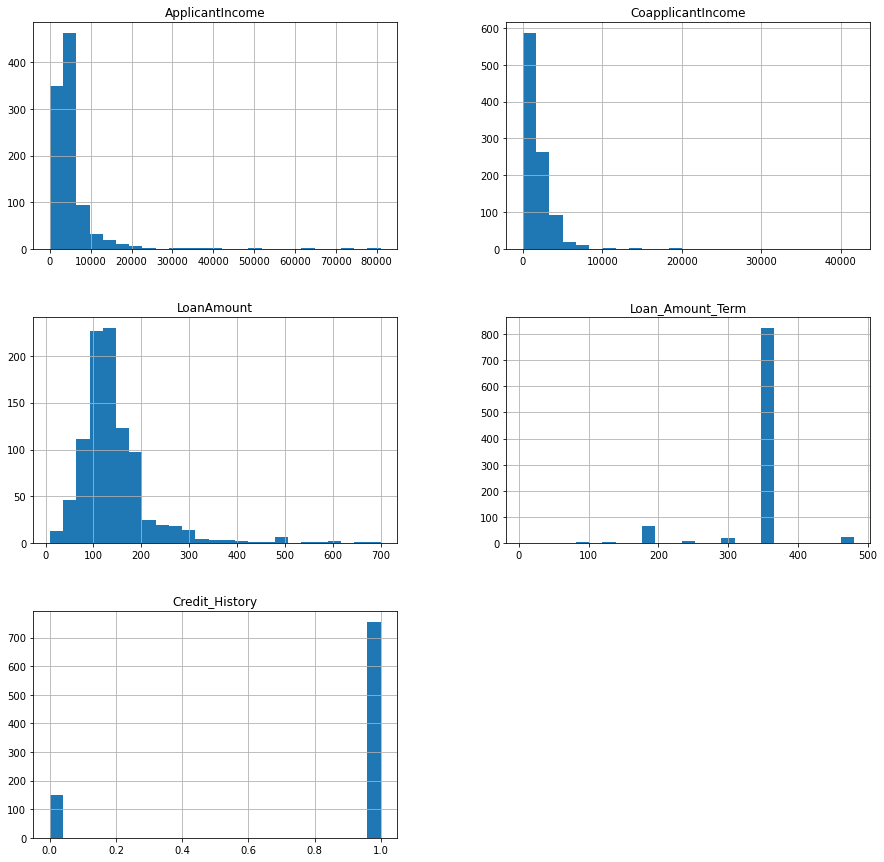

In [11]:
# plot variable distributions
%matplotlib inline 

df.hist(bins=25, figsize=(15,15))
plt.show()

### Takeaways
- I pulled in 2 csv's with 980 rows with each row representing an applicant
- The loan amount is equally distributed
- The applicantincome is right skewed

# Prepare

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df = prepare.prep_function(df)

In [14]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [15]:
# I am going to loop through each col of the type object and encode
for col in df.select_dtypes(include = 'object'):
    df[col]=labelencoder_X.fit_transform(df[col]) 

In [16]:
#split number 1
train, validate, test = prepare.train_validate_test_split(df, 'Loan_Status')

In [17]:
# split number 2
train, validate, test, y_train, X_train, y_validate, X_validate, y_test, X_test = prepare.split_2(train, validate, test)

In [18]:
# scaling
X_train, X_validate, X_test = prepare.scaling(X_train, X_validate, X_test)

### Prepare Takeaways
- I removed all rows with nulls since there weren't too many of them
- I kept the outliers since there were so few and the dataset needs them to predict outliers on the unseen data
- I split the dataframe into train, validate and test and then into X and y
- I encoded my categorical columns
- I scaled X for use in modeling

# Explore

5 questions to explore:

    1. Is there a relationship between applicant income and loan approval
    
    2. Is there a relationship between being male and loan approval
    
    3. Is there a relationship between applicant income and loan amount 
    
    4. Is there a relationship between property area and loan approval 
    
    5. Does loan amount have a relationship with loan approval

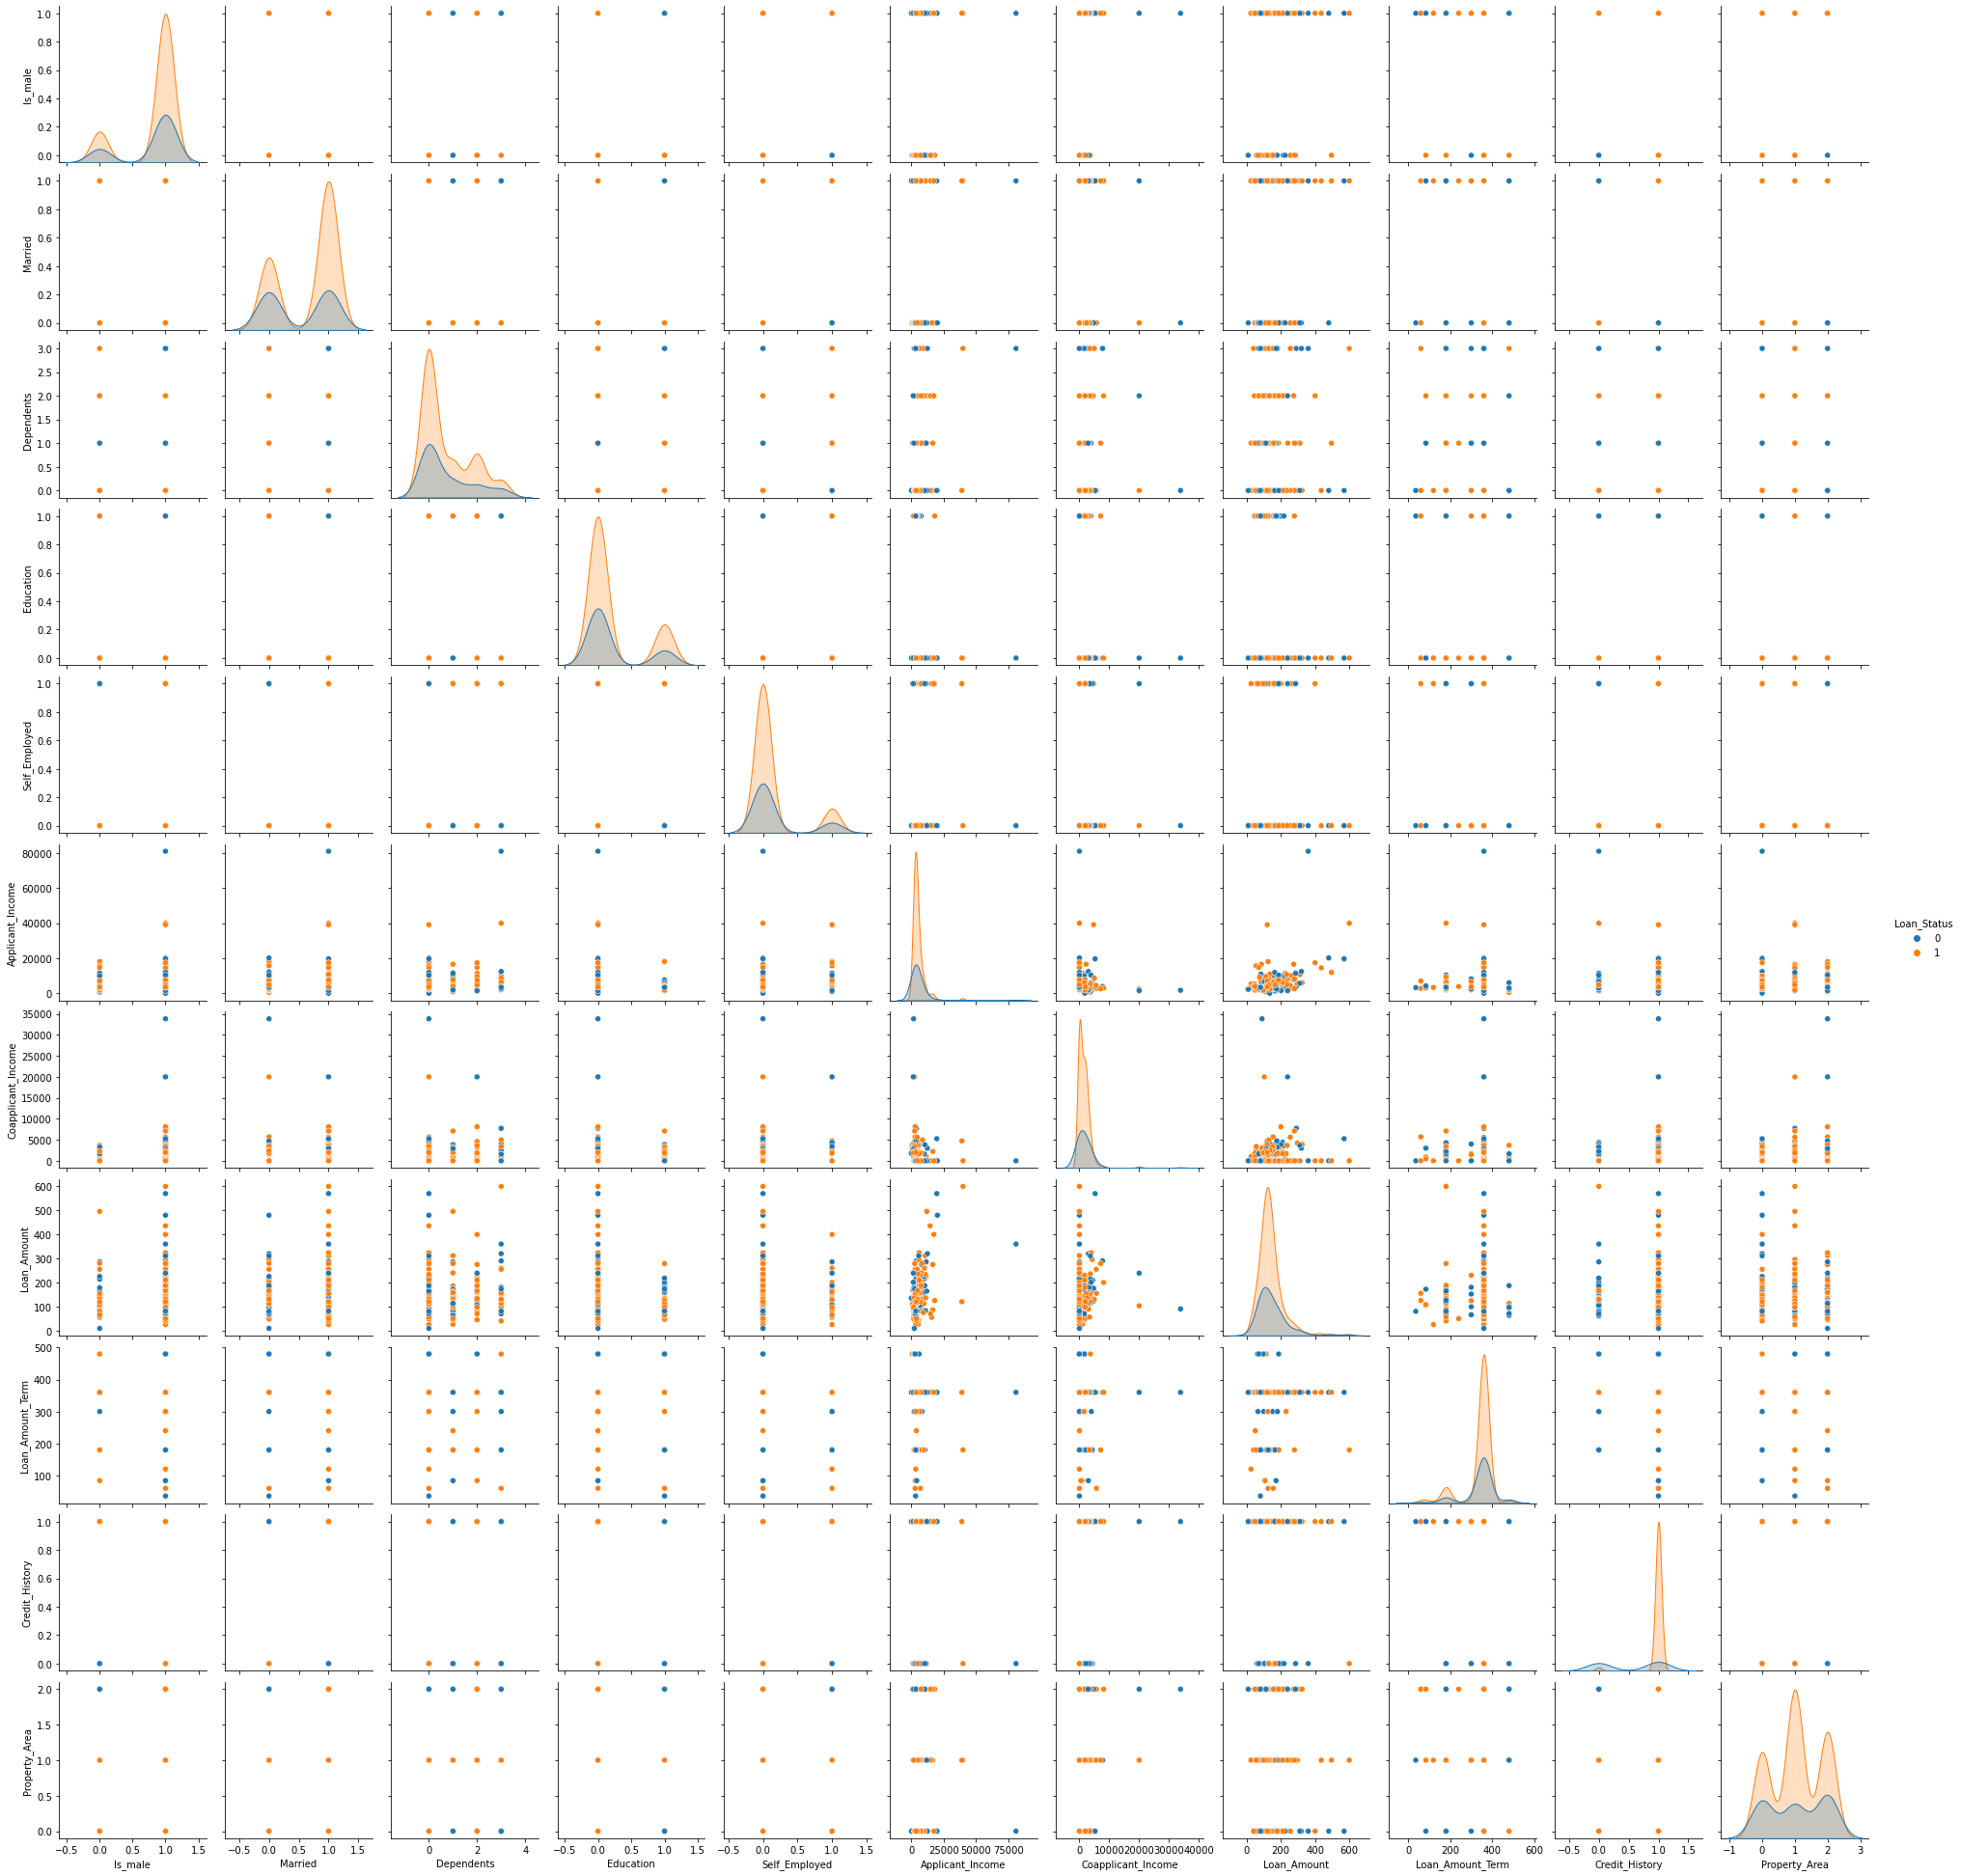

In [19]:
# display some pairplots
sns.pairplot(train, hue='Loan_Status')
plt.show()

In [20]:
df.head()

,Is_male,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [21]:
df.dtypes

Is_male                 int64
Married                 int64
Dependents              int64
Education               int64
Self_Employed           int64
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area           int64
Loan_Status             int64
dtype: object

In [3]:

def get_status_heatmap(df):
    '''returns a heatmap with correlations'''
    plt.figure(figsize=(8,12))
    loan_heatmap = sns.heatmap(df.drop(columns =['Loan_Status',
    'Credit_History','Married', 'Is_male','Dependents','Self_Employed','Education']
                                                 .corr()[['Loan_Status']].sort_values(ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    .set_title('Features Correlated with Loan Status')

SyntaxError: invalid syntax (<ipython-input-3-afef90d9cdec>, line 6)

In [2]:
get_status_heatmap(df)

NameError: name 'get_status_heatmap' is not defined

The above heatmap suggests very little correlation between applicant income and loan status contrary to my intial ideas
This answers the Questions: 1. Is there a relationship between applicant income and loan approval

<AxesSubplot:xlabel='Credit_History'>

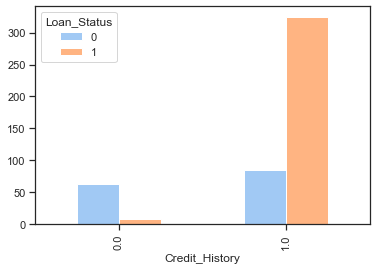

In [67]:
# the heatmap above indicates credit history has the highest correlation with loan status
# so lets take another look with a bar plot
df=df.groupby(['Credit_History','Loan_Status']).size()
df=df.unstack()
df.plot(kind='bar')

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

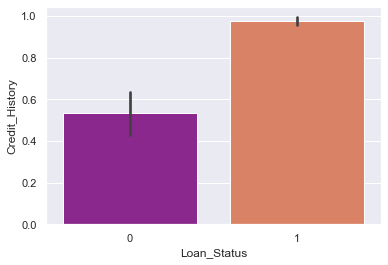

In [83]:
# looking at Credit history in  a different way with a barplot

# set the background style of the plot
sns.set_style('darkgrid')
 
# plot the graph using the default estimator mean
sns.barplot(x ='Loan_Status', y ='Credit_History', data = train, palette ='plasma')

<AxesSubplot:>

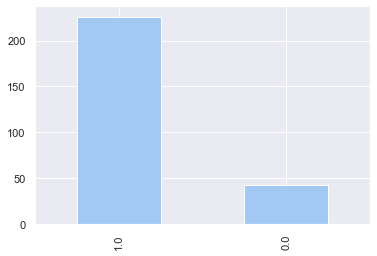

In [93]:
# a bar plot to show the Credit History by category
train['Credit_History'].value_counts().plot(kind ='bar')

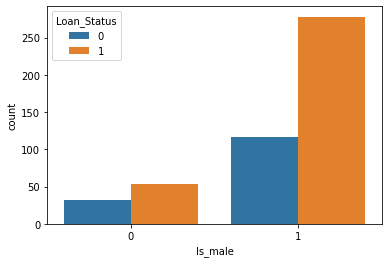

In [23]:
# comparing feature to target, male and not male by Loan Status, in a countplot
sns.countplot(data=df, x='Is_male', hue='Loan_Status')
plt.show()

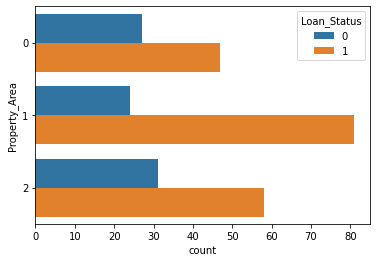

In [24]:
# plot senior_citizen by churn in a countplot
sns.countplot(data=train, y='Property_Area', hue='Loan_Status')
plt.show()

### Statistical Test
let's take this one step further to cement the relationship between loan status and property_area and run a chi2 test
H0: There is no association between property area and loan status
HA: There is an association between property area and loan status

a =.05

In [25]:
contingency_table = pd.crosstab(train.Property_Area, train.Loan_Status)
contingency_table

Loan_Status,0,1
Property_Area,,
0,27,47
1,24,81
2,31,58


In [26]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(4.922318389025131,
 0.08533597261964072,
 2,
 array([[22.64179104, 51.35820896],
        [32.12686567, 72.87313433],
        [27.23134328, 61.76865672]]))

In [27]:
_, p, _, expected = test_results
p

0.08533597261964072

### Outcome
With a high p-value, we fail to reject the null hypothesis and accept there is an association between property area and loan status

This answers Question:
4. Is there a relationship between property area and loan approval 

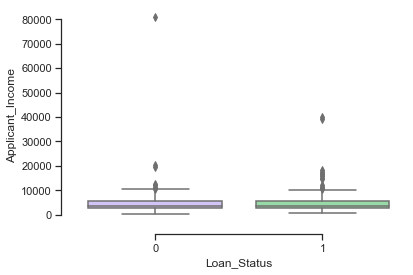

In [29]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot 
sns.boxplot(x="Loan_Status", y="Applicant_Income",
            palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

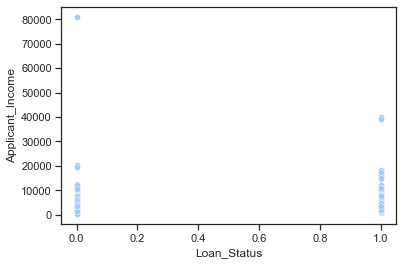

In [30]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=train, x="Loan_Status", y="Applicant_Income", legend=True, sizes=(20, 2000))

# show the graph
plt.show()

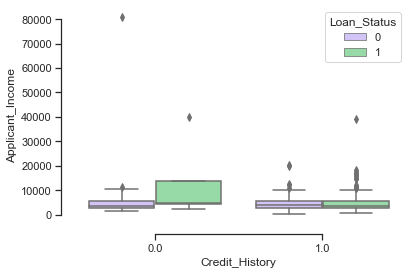

In [31]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Credit_History", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

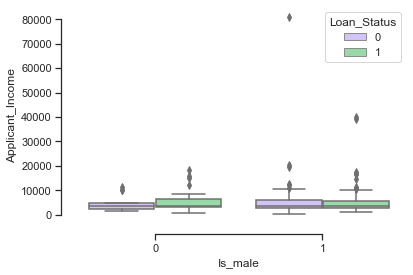

In [32]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Is_male", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

### Statistical Test
-here I want to test if loan status is independent of gender using a Chi2 test
H0: Gender is independent of Loan status 
HA: Gender has a relationship with loan status

In [33]:
a = .05

In [34]:
contingency_table = pd.crosstab(train.Is_male, train.Loan_Status)
contingency_table

Loan_Status,0,1
Is_male,,
0,18,32
1,64,154


In [35]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(0.561158470418679,
 0.4537938534984186,
 1,
 array([[ 15.29850746,  34.70149254],
        [ 66.70149254, 151.29850746]]))

In [36]:
_, p, _, expected = test_results
p > a

True

### Outcome
Since p > a is True we fail to reject H0 that gender is independent of loan status

This answers Question  2. Is there a relationship between gender and loan approval

### Statistical Test
-here I want compare two continuous variables and see if they are linearly correlated
using a Pearson r test
H0: Loan amount and applicant income has no linear correlation 
HA: Loan amount and applicant income have linear correlation 

In [37]:
a = .05

In [38]:
test_results = stats.pearsonr(train.Loan_Amount, train.Applicant_Income)
test_results

(0.4979008674539382, 3.3994686691534077e-18)

In [39]:
r, p = test_results

print(f'p is {p:.10f}')

p is 0.0000000000


### Outcome
-so we can reject the H0 and accept that these two variables are linearly correlated

This answers Question: 3. Is there a relationship between applicant income and loan amount

<AxesSubplot:xlabel='Loan_Amount', ylabel='Applicant_Income'>

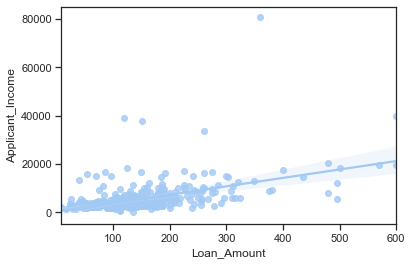

In [40]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["Loan_Amount"], y=df["Applicant_Income"])

5 questions answered:

    1. Is there a relationship between applicant income and loan approval -no
    1. Is there a relationship between applicant income and loan approval - no
    2. Is there a relationship between gender and loan approval - no
    3. Is there a relationship between applicant income and loan amount -yes
    4. Is there a relationship between property area and loan approval -no
    5. Does loan amount have a relationship with loan approval- yes

### Takeaways
- The heatmap showed me the highest correlated features by far are Credit History and Married 
- From the pairplots and other 3 visualization I made you see credit history has a relationship with loan status so I will use this feature in my models.
- From the countplot I can being male has a relationship with loan status, I tested this with a Chi2 test and confirmed there is a relationship
- From another countplot I can see semi urban property area has a relationship with loan status, I tested this with a chi2 test and confirmed they do have a relationship
- From the boxplot I can see education probably has a weak relationship with loan status
- Another box plot surprised me showng that no credit has a relationship with loan status that was the opposite of what I expected to see
- From my scatter plot I can see loan amount and applicant income has a linear relationship, I tested this with a Pearson r test and found this to be true
- The next scatter plot shows me the coapplicant income is has a weaker linear relationship with the loan amount
- I was surprised to find the main driver of approval was credit, far outweighing the other features impact

# Model & Evaluate

For a classification problem, a common choice for the baseline model is a model that simply predicts the most common class every single time.

In [41]:
# Since yes is the most common status for loans I will set yes for all to  my baseline 
# model
baseline = train.Loan_Status.value_counts().nlargest(1)
baseline

1    186
Name: Loan_Status, dtype: int64

In [42]:
# Create my baseline model to have something to compare my future models
# to
baseline = train.Loan_Status.value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 69.4%.


What do you care about?

Minimizing false positives --> Precision

Minimizing false negatives --> Recall

Both Precision and Recall --> F1 score

# Model 2
In modeling I created 5 models and the Random Forest with leaf = 3 and max_depth =3 was the best performer.
## Random Forest

In [43]:
#create the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [44]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=123)

In [45]:
# evaluate the imporatance of each feature
print(rf.feature_importances_)

[0.01099697 0.05039509 0.01730651 0.00904017 0.01172781 0.12823028
 0.09583989 0.14093019 0.05444976 0.44065269 0.04043064]


In [46]:
#1 Credit_History     0.44065269
#2 Loan_Amount        0.14093019
#3 Applicant_Income   0.12823028
#4 Coapplicant_Income 0.09583989
#5 Loan_Amount_Term   0.05444976 
#6 Married            0.05039509   

In [47]:
# classify
y_pred = rf.predict(X_train)

In [48]:
# estimate the probabily of each outcome for loan status
y_pred_proba = rf.predict_proba(X_train)

In [49]:
# compute the accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.82


In [50]:
# print confusion matrix
print(confusion_matrix(y_train, y_pred))

[[ 39  43]
 [  4 182]]


In [51]:
# print classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.48      0.62        82
           1       0.81      0.98      0.89       186

    accuracy                           0.82       268
   macro avg       0.86      0.73      0.75       268
weighted avg       0.84      0.82      0.81       268



In [52]:
# Compute the accuracy of the model when run on the validate dataset
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


Summary of Model Performance


|            Model                 |         Validate Accuracy        |
|----------------------------------|----------------------------------|               
|Baseline                          | 69.4%                            |
|Decision Tree                     | 79%                              |
|Random Forest                     | 84%                              |
|KNN                               | 78%                              | 
|Logistic Regression c=1           | 72%                              |
|Logistic Regression c=0.1         | 79%                              |
|Random Forest(w/ only spec feat.) | 80%                              | 

In [59]:
df.prediction.value_counts()

1    395
0     85
Name: prediction, dtype: int64

### Takeaway
- I used my selected features in my last model to see if it would improve accuracy but it did not help and dropped the accuracy, the features I selescted were 2 I found a relationship with loan status in explore and two the feature importance listed as the most valuable features, I was surprised this did not increase my accuracy rate on model 6.
-  Model 2 Random Forest was the best giving me 84% accuracy so I will use this for the test data.  I took into consideration that precision was also important to consider when predicting loan approvals (my positives), because it is most expensive to the bank to approve a loan that may not be repaid, and the same model held the highest precision rate at 81%.

### Test

In [53]:
# Compute the accuracy of the model when run on the test dataset
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.78


In [54]:
X = df.drop(columns="Loan_Status")

In [55]:
# make a new column named prediction to hold the outcomes
df['prediction'] = rf.predict(X)

In [56]:
df = df.drop(columns="Loan_Status")

,Is_male,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,prediction
Loan_ID,,,,,,,,,,,,
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


In [61]:
# writing Loan Status predictions to a csv
df.to_csv('loan_predictions.csv')

# Conclusion

Key takeaway: 
-Some of the features I guessed would be valuable like applicant income and gender were not in a strong relationship with the target. 
-We find that one ML method, random forest Model 2 improves tthe accuracy of default predictions the most in the loan dataset. This ML method is superior to the baseline model of predicting the mode.

Next Steps: With more time I would create loops to create a multitude of models varying their parameters and features to find the best accuracy.

